# <p style="text-align:center">Travail personel 2: Résolution d'équation non-linéare</p> #

Présenté par l'équipe 9: **Mathieu Dumais**, **Antoine Rousseau** et **Gabriel Lapointe**.

Présenté à **Philippe Després**.

Date: **26 février 2021**.


## Question 1 ###

Nous cherchons la position des points de rebroussement ($x$) ou, en d'autre mots, la position maximal et minimal d'une particules relativement à une autre lors  d'une interaction inter-nucléaire, en fonction de l'énergie discrète totale de l'intéraction ($\epsilon_n$). Sachant que la vitesse est nul lorsque les extrémités de mouvement sont atteind, l'énergie consiste tout simplement à l'énergie potentiel, exprimé dans notre cas par le potentiel de Lennard-Jones:
\begin{equation}
    \Rightarrow v(x)=4\left[\left(\frac{1}{x}\right)^{12} - \left(\frac{1}{x}\right)^6\right]
\end{equation}
(à noter que les énergies utilisées dans ce numéro sont des ratios de l'énergie en question par rapport à la profondeur du puit de potentiel de la liaison intermoléculaire $V_0$)

Ainsi, nous pouvons isoler $x$ dans l'équation suivante:
\begin{equation}
    \Rightarrow \epsilon_n = 4\left[\left(\frac{1}{x}\right)^{12} - \left(\frac{1}{x}\right)^6\right]
\end{equation}
Nous donnant:
\begin{equation}
    \Rightarrow x = \pm \left[2^{1/6} \left(-\frac{\sqrt{\epsilon_n + 1} + 1}{\epsilon_n}\right)^{1/6}\right]
\end{equation}

Le dernier résultat fut solvé sur Wolfram Alpha lorsque l'énergie $\epsilon_n\ne 0$

## Question 2, 3 ###

Le code suivant défini une fonction (epsilon) permettant de calculer epsilon en fonction de gamma et de n. L'énergie des 20 premiers états vibrationnels (n < 20) est ensuite calculée. La figure résultante montre le potentiel de Lennard-Jones et les 20 niveaux d'énergies calculés (lignes brisés). Les points de chaque côté des lignes d'énergie correspondent aux deux points de rebroussement calculés pour chaque énergie calculé

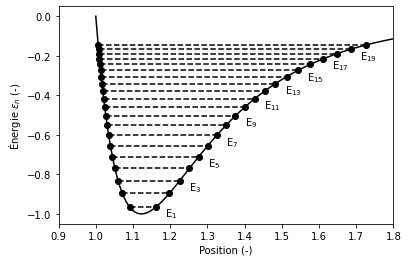

In [12]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

#function that defines V(x)
def V(x):
    return 4*((1/x)**12-(1/x)**6)

#function that defines the function to integrate i.e. (E-v(x))^2
def g(E,x):
    v = V(x)
    return (E - v)**(1/2), v

#function defining the turning points
def x_plusminus(E):
    x_minus = 2**(1/6) * (np.sqrt(E+1)/E-1/E)**(1/6)
    x_plus = 2**(1/6) * (-((np.sqrt(E+1)+1)/E))**(1/6)
    return x_plus, x_minus

#function that calculates the integral
def f(E, gamma, n):
    x_plus, x_minus = x_plusminus(E) 
    integral, error = integrate.quad(lambda x :g(E,x)[0], x_minus, x_plus)
    return gamma * integral - (n+1/2)*np.pi

#function that computes epsilon with gamma and n as an input
def epsilon(gamma, n, error):
    x1 = -1
    x2 = -0.0000000001
    fx1 = f(x1, gamma, n)
    fx2 = f(x2, gamma, n)
    N = 0
    
    while np.abs(x2-x1) > error:
        x_prime = 0.5*(x1 + x2)
        new_f = f(x_prime, gamma, n)
        
        if new_f == 0: 
            break
        elif new_f*fx1 > 0:
             x1 = x_prime
             fx1 = new_f
        elif new_f*fx2 > 0:
            x2 = x_prime
            fx2 = new_f

        N += 1
            
    return 0.5*(x1+x2), N

E_list = []
V_list = []
N_list = []
n_list = list(range(20))
x_list = np.linspace(1, 1.8, 100)
x_plus_list = []
x_minus_list = []

#for loop that gets the energy for n < 20
for i in n_list:
    E, N = epsilon(150, i, 1e-8)
    x_plus, x_minus = x_plusminus(E)
    E_list += [E]
    x_plus_list += [x_plus]
    x_minus_list += [x_minus]
    
for i in x_list:
    V_list += [V(i)]
    
#Plotting of V(x) that shows the computed energies and turning points
plt.plot(x_list, V_list, "k")
plt.xlim(0.9, 1.8)

for i in range(len(E_list)):
    plt.hlines(E_list[i], x_minus_list[i], x_plus_list[i], linestyles = '--')

    if i % 2 == 0:
        string = "E" + "$_{" + str(i + 1) + "}$"
        plt.text(x_plus_list[i] + 0.025, E_list[i] - 0.05, string)
plt.plot(x_minus_list, E_list, "ko")
plt.plot(x_plus_list, E_list, "ko") 
plt.xlabel("Position (-)")
plt.ylabel("Énergie $\epsilon_{n}$ (-) ")
plt.show()

## Question 4 ###

Le code suivant défini une fonction qui calcule l'énergie $\epsilon_{n}$ à l'aide de la méthode de la bissection et la méthode de la sécante. Le temps nécessaire pour calculer l'énergie des 20 premiers états vibrationnels est ensuite obtenue et comparer pour chauqe méthode. On constate que la méthode de la sécante est environ 3 fois plus rapide dans ce contexte. 

In [11]:
import numpy as np
from scipy import integrate
import timeit

#function that defines V(x)
def V(x):
    return 4*((1/x)**12-(1/x)**6)

#function that defines the function to integrate i.e. (E-v(x))^2
def g(E,x):
    v = V(x)
    return (E - v)**(1/2), v

#function defining the turning points
def x_plusminus(E):
    x_minus = 2**(1/6) * (np.sqrt(E+1)/E-1/E)**(1/6)
    x_plus = 2**(1/6) * (-((np.sqrt(E+1)+1)/E))**(1/6)
    return x_plus, x_minus

#function that calculates the integral
def f(E, gamma, n):
    x_plus, x_minus = x_plusminus(E) 
    integral, error = integrate.quad(lambda x :g(E,x)[0], x_minus, x_plus)
    return gamma * integral - (n+1/2)*3.141592

#function that computes epsilon using the bissection method
def bissection(gamma, n, error):
    x1 = -1
    x2 = -0.0000000001
    fx1 = f(x1, gamma, n)
    fx2 = f(x2, gamma, n)
    N = 0
    
    while np.abs(x2-x1) > error:
        x_prime = 0.5*(x1 + x2)
        new_f = f(x_prime, gamma, n)
        
        if new_f == 0: 
            break
        elif new_f*fx1 > 0:
             x1 = x_prime
             fx1 = new_f
        elif new_f*fx2 > 0:
            x2 = x_prime
            fx2 = new_f

        N += 1
            
    return 0.5*(x1+x2), N

#function that computes epsilon using the secant methode
def secant(gamma, n, error):
    x0 = -1 
    x1 = -0.0000000001
    fx0 = f(x0, gamma, n)
    fx1 = f(x1, gamma, n)
    N = 0
    
    while np.abs(x1 - x0) > error:
        N += 1
        x_next = x1 - fx1*((x1-x0)/(fx1-fx0))
        x0 = x1
        fx0 = fx1
        x1 = x_next
        fx1 = f(x1, gamma, n)
        
    return x1, N

#function that evaluates the time needed to compute the 20 first energies for a given algorithm
def time_algorithm(algo_type, target):
    E_list = []
    start_time = timeit.default_timer()
    
    for i in range(20):
        if algo_type == "bissection":
            E = [bissection(150, i, target)[0]]
                   
        elif algo_type == "secant":
            E = [secant(150, i, target)[0]]
        
        E_list += [E]
        
        end_time = timeit.default_timer()
            
    return (end_time-start_time)

#Comparison of algorithm speed
print("Méthode de la bissection : " + str(1000 * time_algorithm("bissection", 1e-8)) + " ms")
print("Méthode de la sécante : " + str(1000 * time_algorithm("secant", 1e-8)) + " ms")


Méthode de la bissection : 243.61109999995278 ms
Méthode de la sécante : 79.22670000004928 ms


## Question 5 ###

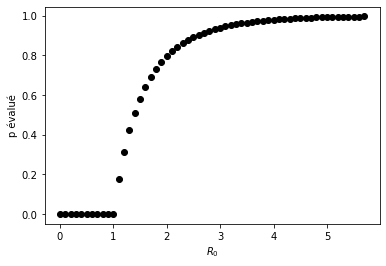

In [1]:
import numpy as np
import matplotlib.pyplot as plt

R0_list = np.linspace(0, 5.7, 58) # Liste des R0 pour lesquels p sera évalué
p_list = []
p_initial = 1

# Définition de l'équation qui modélise une pandémie
def RHS(p,R0):
    next_p = 1-np.exp(-R0*p) 
    return next_p

# Fonction qui opère la methode de relaxation afin d'obtenir une précision voulue (target)
def relaxation(R0, target = 1e-8):
    p = p_initial
    p_old = 1000
    
    while np.abs(p-p_old) > target:        
        p_old = p
        p = RHS(p, R0)    
    
    return p

# Création de la liste ccontenant les valeurs de p correspondant aux valeurs de R0 déterminées
for R0 in R0_list:
    p_list += [relaxation(R0)]

# Réalisation du graphique de p selon R0
plt.plot(R0_list, p_list, "ko");
plt.xlabel('$R_{0}$')
plt.ylabel('p évalué')
plt.show()

## Question 6 ###

 x* est la solution de l'équation originale.
  
 x' est la valeur du prochain estimé.
  
 On a donc que x* = x + $\epsilon$. $\epsilon$ est la différence entre x et x*.
 
 Près de x*, on a que:
 
 $\epsilon' = \epsilon f'(x^*)$.
 
 On a donc
 
 $x^* = x + \frac{\epsilon'}{f'(x^*)} = x' + \epsilon'$
 
 $x - x' = \frac{-\epsilon'}{f'(x^*)} + \epsilon'$
 
 $x - x' = \epsilon' \left(1 - \frac{1}{f'(x^*)}\right)$
 
 $\epsilon ' = \frac{x - x'}{1 - \frac{1}{f'(x^*)}}$.
 
 On sait que $x' = f(x)$ et que $x' = (1 + \omega)f(x) -\omega x$, donc:
 
 $f(x) = (1 + \omega)f(x) - \omega x$
 
 $f'(x) = (1 + \omega)f'(x) - \omega$.
 
 Ici, on suppose que $f'(x) = f'(x^*)$ puisque x est près de x*. On obtient alors:
 
 $f'(x^*) = (1 + \omega)f'(x) - \omega$.
 
 En substituant, on obtient:
 
 $\epsilon ' = \frac{x - x'}{1 - \frac{1}{(1 + \omega)f'(x) - \omega}}$
 
 CQFD

## Question 7 & 8 ###

nombre d'itérations nécessaire pour obtenir une précision sur p de 10e-6 par la méthode de ralaxation: 14
nombre d'itérations nécessaire pour obtenir une précision sur p de 10e-6 par la méthode de ralaxation accélérée: 4


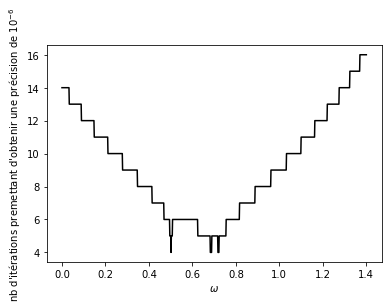

In [2]:
import numpy as np
import matplotlib.pyplot as plt


R0 = 2
p_list = []
n_list = []
p_initial = 1

# Définition de l'équation qui modélise une pandémie
def RHS(p,R0):
    next_p = 1-np.exp(-R0*p) 
    return next_p

# Fonction qui opère la methode de relaxation afin d'obtenir une précision voulue (target)
def relaxation(R0, target = 1e-6):
    p = p_initial
    p_old = 1000
    n = 0
    
    while np.abs(p-p_old) > target:        
        p_old = p
        p = RHS(p, R0)    
        n += 1
    
    return p,n

# Fonction qui opère la methode de relaxation accélérée afin d'obtenir une précision voulue (target)
def relaxation_accel(R0, w, target = 1e-6):
    p = p_initial
    p_old = 1000
    n = 0
    
    while np.abs(p-p_old) > target:        
        p_old = p
        p = (1+w)*RHS(p, R0) - w*p
        n += 1
    
    return p, n

# Liste des w pour lesquels le nombre d'itération permettant d'obtenir une précision de 10^-6 sera évalué
w_list = np.linspace(0, 1.4, 1000)

# Liste contenant le nombre d'itération permettant d'obtenir une précision de 10^-6 pour un w donné
for w in w_list:
    n_list += [relaxation_accel(R0, w)[1]]

print("nombre d'itérations nécessaire pour obtenir une précision sur p de 10e-6 par la méthode de ralaxation: " + str(relaxation(R0)[1]))
print("nombre d'itérations nécessaire pour obtenir une précision sur p de 10e-6 par la méthode de ralaxation accélérée: " + str(relaxation_accel(R0, 0.685)[1]))

# Représentation graphique du nombre d'itération permettant d'obtenir une précision de 10^-6 selon w
plt.plot(w_list, n_list, "k");
plt.xlabel('$\omega$')
plt.ylabel("nb d'itérations premettant d'obtenir une précision de $10^{-6}$")
plt.show()

## Question 9###

 Dans le cas où la fonction oscille autour de la valeur x* (solution exacte), un $\omega$ < 0 peut permettre de converger plus rapidement.

 Par exemple: la fonction $x = \sqrt{1 - \log{x}}$ avec un x initial = 1/2.

 Les 5 premières itérations donnent: 

 1.3012

 0.8583

 1.0736

 0.9637

 1.0182.

 Ces valeurs oscillent autour de x* = 1.

 Un facteur $\omega$ < 0 judicieusement choisie permet de converger vers la solution plus rapidement que la méthode de relaxation normale.

# Références

[1] M. E. Newman, Computational Physics. CreateSpace, 2013.